# Importing Libraries and Modules

In [38]:
!pip install kaggle

In [39]:
from google.colab import files

# Upload the Kaggle API key file
uploaded = files.upload()
# Move the uploaded Kaggle API key file to the correct directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
# Set permissions for the Kaggle API key file
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [40]:
!kaggle datasets download -d smaranjitghose/corn-or-maize-leaf-disease-dataset

Dataset URL: https://www.kaggle.com/datasets/smaranjitghose/corn-or-maize-leaf-disease-dataset
License(s): copyright-authors
corn-or-maize-leaf-disease-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [41]:
!unzip /content/corn-or-maize-leaf-disease-dataset.zip

Archive:  /content/corn-or-maize-leaf-disease-dataset.zip
replace data/Blight/Corn_Blight (1).jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace data/Blight/Corn_Blight (1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace data/Blight/Corn_Blight (10).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace data/Blight/Corn_Blight (100).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace data/Blight/Corn_Blight (1000).JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace data/Blight/Corn_Blight (1001).JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace data/Blight/Corn_Blight (1002).JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace data/Blight/Corn_Blight (1003).JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace data/Blight/Corn_Blight (1004).JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace data/Blight/Corn_Blight (1005).JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace data/Blight/Corn_Blight (1006).JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace data/Blight/Corn_B

In [42]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
! pip install tensorflow
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import pandas as pd

In [43]:
IMAGE_SIZE = (256,256)
BATCH_SIZE = 32 # at once 32 images are processed
CHANNELS = 3 # RGB images are colour

# Importing Images

In [44]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/data",
    shuffle=True,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

Found 4188 files belonging to 4 classes.


In [45]:
dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [46]:
for images, labels in dataset:
    # Print the shape of the images and labels
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)
    break  # Stop after the first batch

Images shape: (32, 256, 256, 3)
Labels shape: (32,)


In [47]:
class_names = dataset.class_names
class_names

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

In [48]:
len(dataset)

131

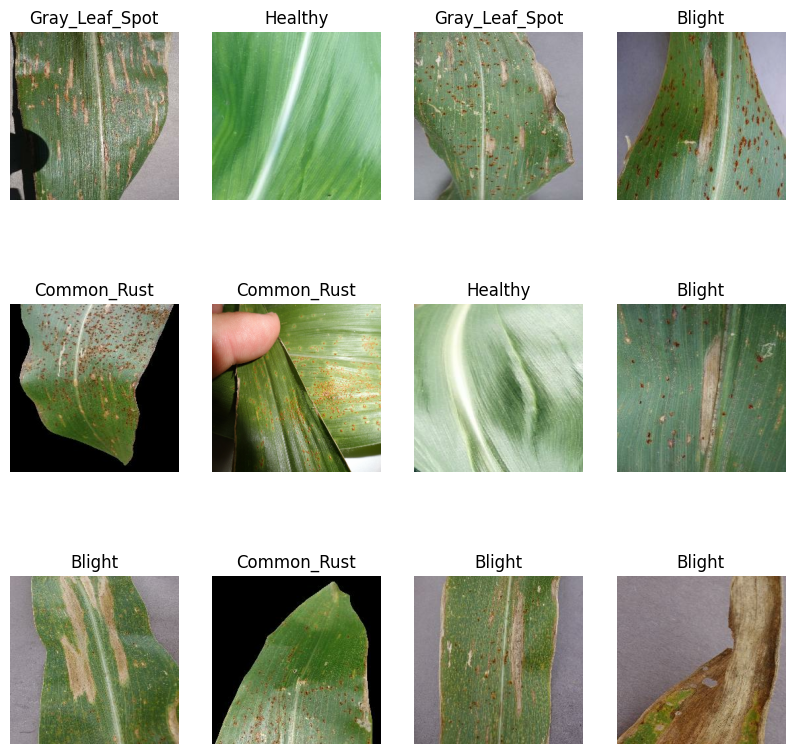

In [49]:
plt.figure(figsize=(10,10)) # Every image is of size 10*10
for image_batch , label_batch in dataset.take(1): # take 1 bach at a time
    for i in range(12): # shows 12 images
        ax = plt.subplot(3,4,i+1) # 3 row 4 columns and i+1 is placing the image
        plt.imshow(image_batch[i].numpy().astype('uint8')) # image_batch[i] select the i th image,.numpy().astype('uint8')) converys into viewable format
        plt.title(class_names[label_batch[i]]) # shows which class it belonga to
        plt.axis('off') # images have some numbers, it romove that numbers and borders so the images look clean.

EDA

In [50]:
class_names = dataset.class_names
label_counts = {label: 0 for label in class_names}

for images, labels in dataset:
    for label in labels:
        label_name = class_names[label]
        label_counts[label_name] += 1

for label, count in label_counts.items():
    print(f"{label}: {count}")

Blight: 1146
Common_Rust: 1306
Gray_Leaf_Spot: 574
Healthy: 1162


In [51]:
class_names

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

In [52]:
labels

<tf.Tensor: shape=(28,), dtype=int32, numpy=
array([1, 1, 1, 2, 0, 0, 1, 1, 2, 0, 1, 1, 2, 0, 2, 3, 3, 0, 1, 3, 1, 3,
       0, 3, 3, 3, 3, 0], dtype=int32)>

In [53]:
label_counts

{'Blight': 1146, 'Common_Rust': 1306, 'Gray_Leaf_Spot': 574, 'Healthy': 1162}

Data splitting

In [54]:
def get_dataset(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=8)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds

In [55]:
train_ds,val_ds,test_ds = get_dataset(dataset)

In [56]:
print("Length of Training Dataset is",len(train_ds))
print("\nLength of Validation Dataset is",len(val_ds))
print("\nLength of Testing Dataset is",len(test_ds))

Length of Training Dataset is 104

Length of Validation Dataset is 13

Length of Testing Dataset is 14


In [57]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [58]:
resize_and_rescale= tf.keras.Sequential([
layers.Resizing(256,256),# convert all the images in to 256*256 size
layers.Rescaling(1.0/255) # make all pixcels of images between 0 to 1
])


In [59]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.3),
])

# Model Building

In [60]:
! pip install tensorflow
from tensorflow.keras import layers, models

n_classes = 4
input_shape = (None, 256, 256, 3)  # 'None' for batch size to be flexible

resize_and_rescale # = ...  Assuming you have defined this earlier

model = models.Sequential([layers.Input(shape=(256, 256, 3)),
    resize_and_rescale ,

    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    # Third Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    # Fourth Convolutional Block
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    # Fifth Convolutional Block
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    # Flattening & Fully Connected Layers
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape=input_shape)

In [61]:
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_14 (Sequential)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_55 (Conv2D)                   │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_55 (MaxPooling2D)      │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_55 (Dropout)                 │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_56 (Conv2D)                   │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_56 (MaxPooling2D)      │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_56 (Dropout)                 │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_57 (Conv2D)                   │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_57 (MaxPooling2D)      │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_57 (Dropout)                 │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_58 (Conv2D)                   │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_58 (MaxPooling2D)      │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_58 (Dropout)                 │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_59 (Conv2D)                   │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_59 (MaxPooling2D)      │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_59 (Dropout)                 │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 10,000,804 (38.15 MB)

 Trainable params: 10,000,804 (38.15 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics=['accuracy']
)

# Model Fitting

In [63]:
history = model.fit(
  train_ds,
  epochs=20,
  batch_size=BATCH_SIZE,
  validation_data=val_ds
)

Epoch 1/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 55s 303ms/step - accuracy: 0.4472 - loss: 1.2592 - val_accuracy: 0.5938 - val_loss: 0.7720
Epoch 2/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.7811 - loss: 0.4890 - val_accuracy: 0.8293 - val_loss: 0.4769
Epoch 3/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.8341 - loss: 0.4097 - val_accuracy: 0.8606 - val_loss: 0.3103
Epoch 4/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.8367 - loss: 0.3903 - val_accuracy: 0.8702 - val_loss: 0.3051
Epoch 5/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.8626 - loss: 0.3249 - val_accuracy: 0.8630 - val_loss: 0.3051
Epoch 6/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.8879 - loss: 0.2684 - val_accuracy: 0.8990 - val_loss: 0.2449
Epoch 7/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - accuracy: 0.8897 - loss: 0.2557 - val_accuracy: 0.8942 - val_loss: 0.2324
Epoch 8/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - accuracy: 0.9105 - loss: 0.2270 - val_

In [64]:
scores = model.evaluate(test_ds)

14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9709 - loss: 0.1351


In [65]:
history

In [66]:
history.params

{'verbose': 'auto', 'epochs': 20, 'steps': 104}

In [67]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

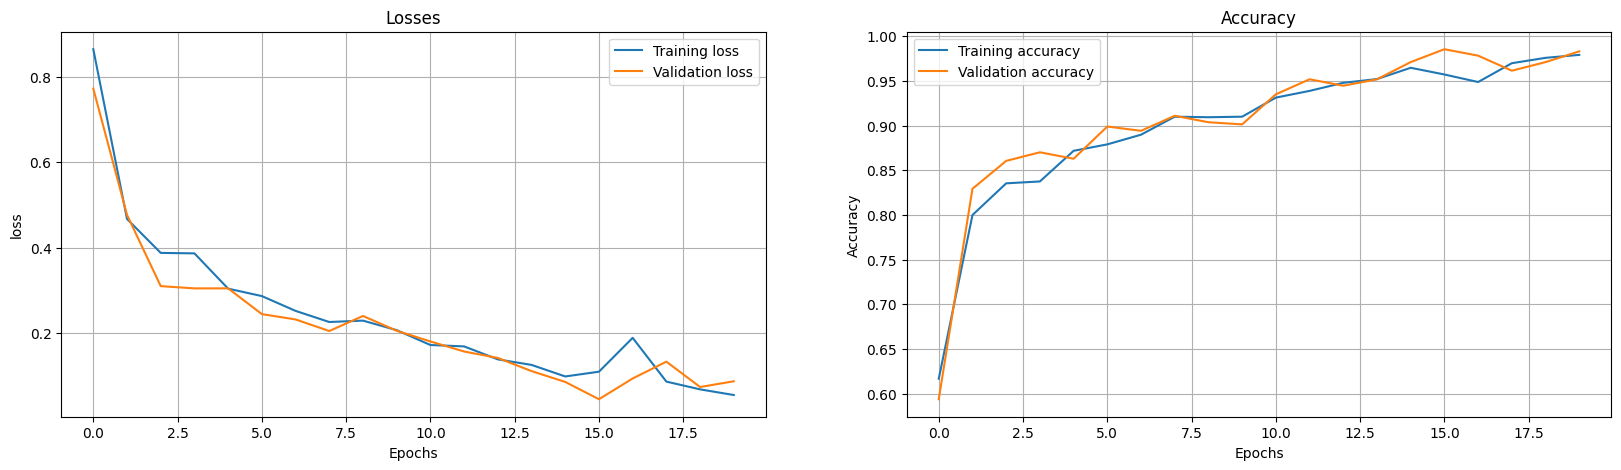

In [68]:
his_data = pd.DataFrame(history.history)
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(his_data.loss, label="Training loss")
plt.plot(his_data.val_loss, label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("Losses")
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(his_data.accuracy, label="Training accuracy")
plt.plot(his_data.val_accuracy, label="Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.grid()
plt.legend()

# Prediction

First Image to Predict :

Actual label: Blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step

Predicted label Blight


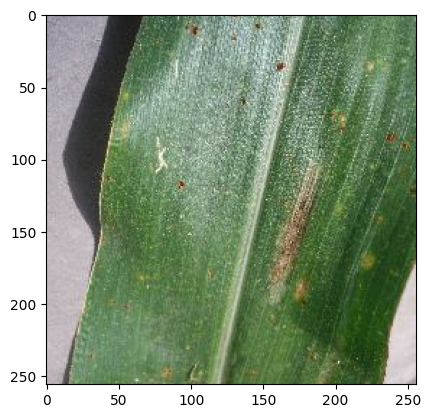

In [69]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("First Image to Predict :")
    plt.imshow(first_image)
    print("\nActual label:",class_names[first_label])
    batch_prediction = model. predict (images_batch)
    print("\nPredicted label" ,class_names[np.argmax(batch_prediction[0])])

In [78]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy()) #images[i].numpy() convert image inti numeric and the rest code will make the numeri values model understandable format
    img_array = tf.expand_dims(img_array, 0) # Create a batch coz model likes batchs not 1 image
    predictions = model.predict (img_array) # predicting,prediction is in a value form
    predicted_class = class_names[np.argmax(predictions[0])] # the value belongs to which class is estimated here
    confidence = round(100*(np.max(predictions[0])),2) # calculate the % of the value we got upto 2 decimals

    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


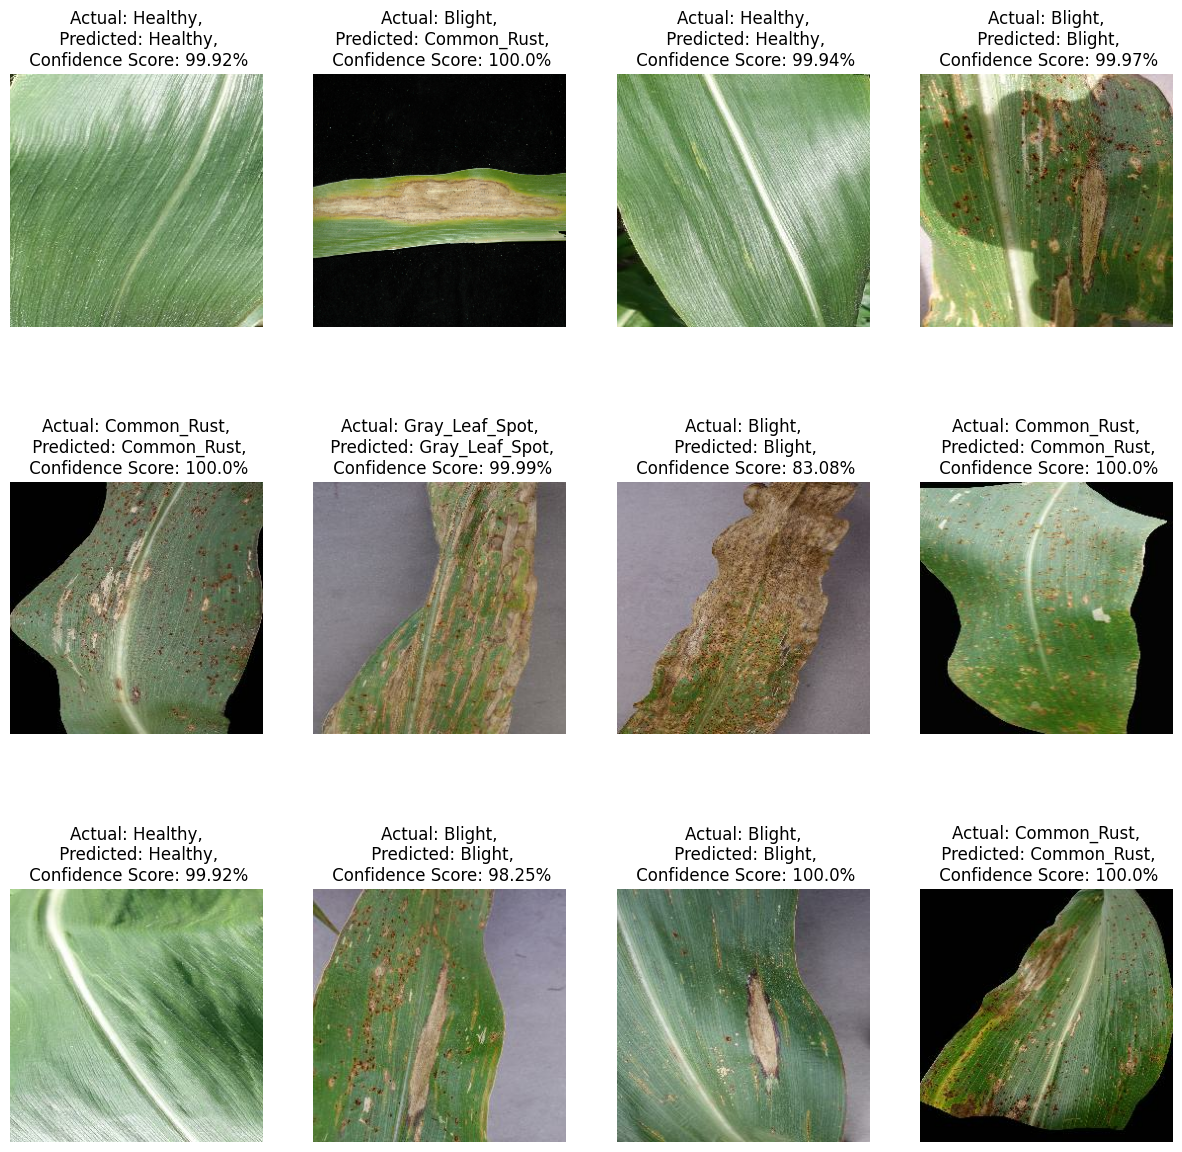

In [71]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class , confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence Score: {confidence}%")
        plt.axis("off")

**Creating Gradio Application**

In [72]:
# importing gradio to create interface
%%capture
!pip install gradio

In [81]:
import gradio as gr
import numpy as np

# Load your model (make sure to load your trained model)
# model = models.load_model('your_model_path')  # Replace with your model file

# Define the image preprocessing function
def preprocess_image(image):
    # Resize and rescale the image just like you did during training
    resize_and_rescale = tf.keras.Sequential([
        layers.Resizing(256, 256),
        layers.Rescaling(1.0 / 255)
    ])

    image = resize_and_rescale(image)  # Resize and normalize
    return image

def predict(image):
    # Preprocess the image
    processed_image = preprocess_image(image)

    # Add a batch dimension (because the model expects a batch of images)
    processed_image = tf.expand_dims(processed_image, 0)

    # Predict using the model
    predictions = model.predict(processed_image)
    predicted_class = np.argmax(predictions[0])  # Get the class with the highest probability
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)  # Confidence percentage

    return f"Predicted Class: {predicted_class}, Confidence: {confidence}%"

# Create a Gradio interface
iface = gr.Interface(
    fn=predict,  # The function to call when an image is uploaded
    inputs=gr.Image(type="numpy"),  # Input type: Image
    outputs="text",  # Output type: Text
    live=True,  # If set to True, the output updates while interacting with the input
    title="Plant Disease Prediction",  # Interface title
    description="Upload a plant image to predict its disease using the model."
)

# Launch the Gradio interface
iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://489a2cf1042d2ee25d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
